In [3]:
import numpy as np
import sys
import re
import os
import matplotlib.pyplot as plt
import cygnus_lib as cy
import mylib as my
import scipy.ndimage
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
%matplotlib inline
my.set_atlas_style('large')

In [4]:
dataSelection = 'LAB'
run = 818
traccia = 0
print(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))


Data/LAB/Data_Camera/H5/Run818/run818-0000.h5


/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Data/LAB/Data_Camera/H5/Run740/run740-0003.h5


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


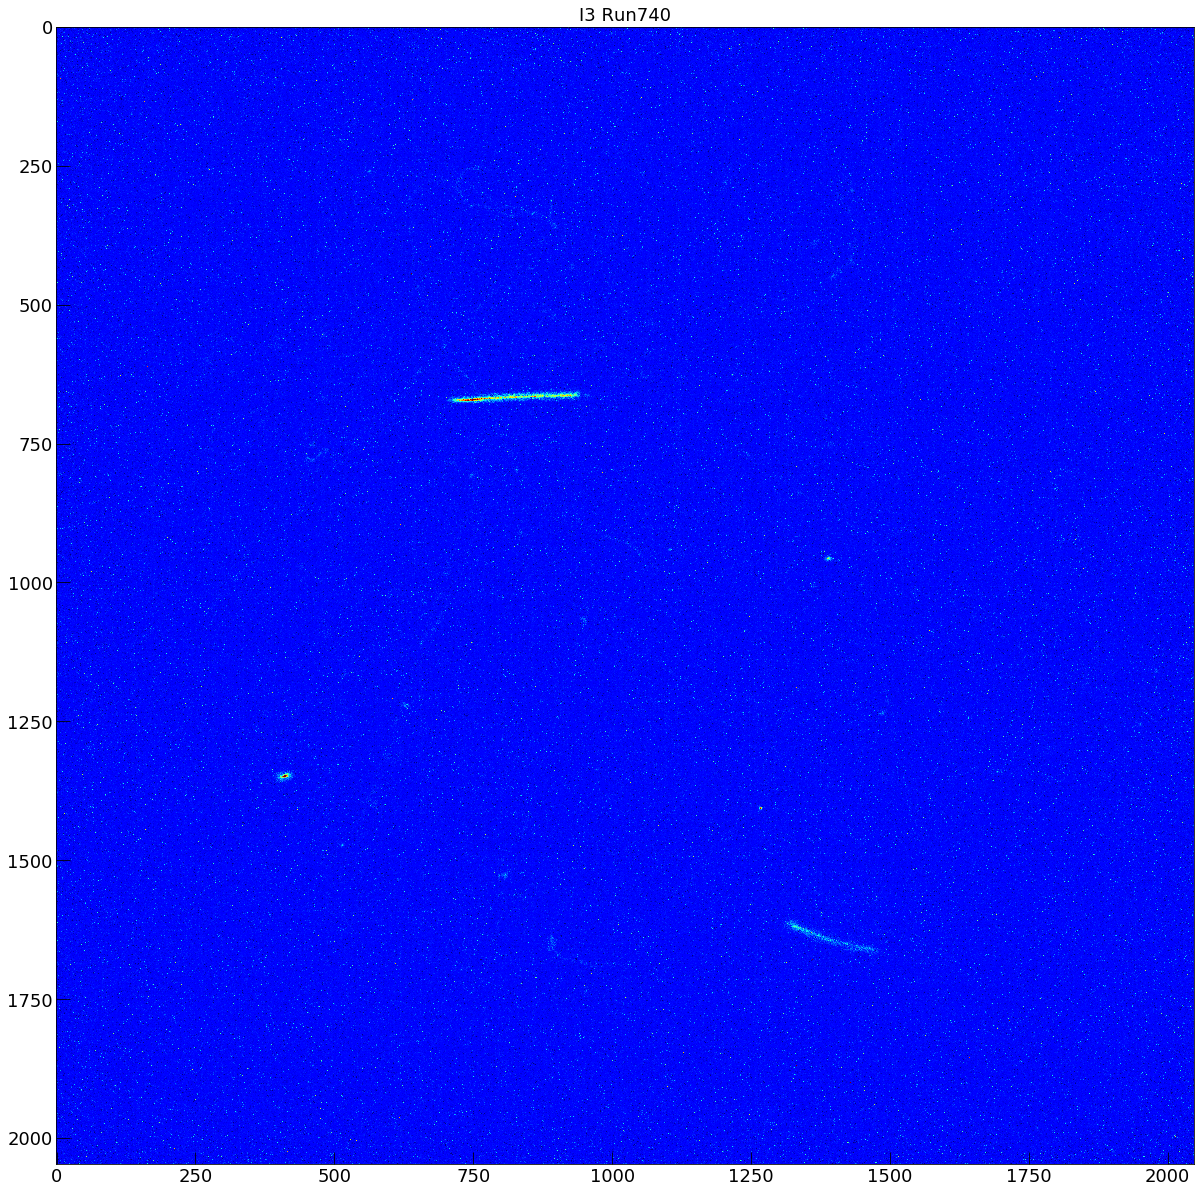

In [5]:
my.set_atlas_style('large')
dataSelection = 'LAB'
run = 740
traccia = 3
try:
    print(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
    image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
    plt.title("I%d Run%d" % (traccia, run))
    plt.imshow(image, cmap="jet", vmin=85,vmax=200)
    #plt.savefig('/Volumes/Mac_DATA/Cygnus/Data/BTF_2017-2/Data_Image/I%dRun%d_FNG.eps' % (traccia, run), format='eps')
    plt.show()
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
    


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


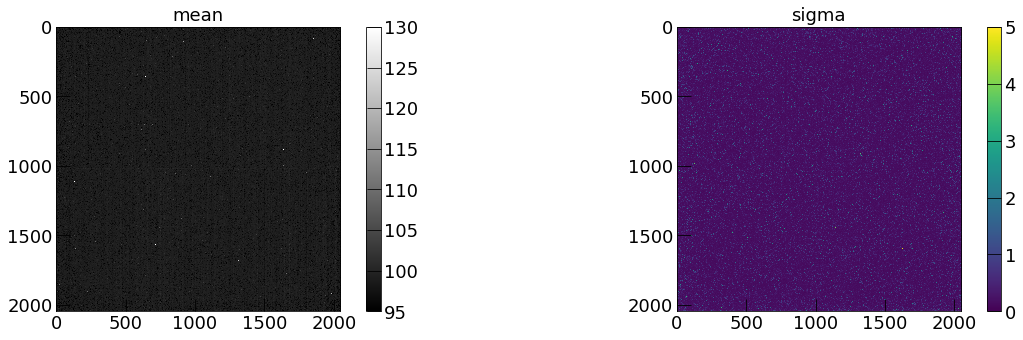

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


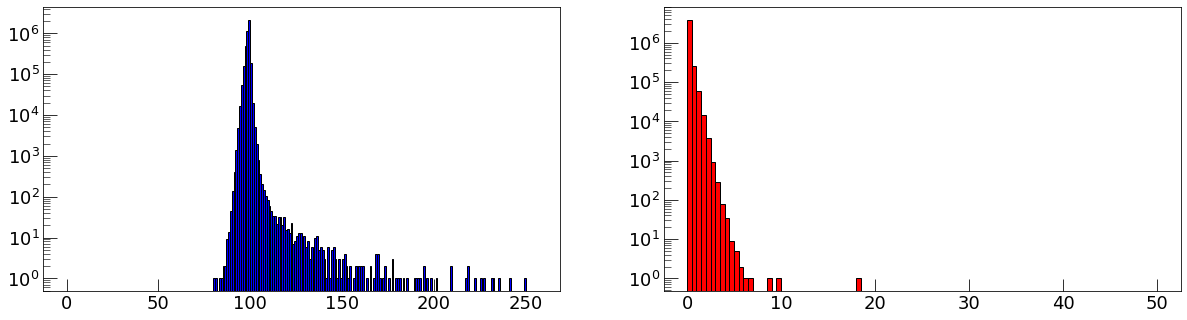

98.85070244207851 1.1925405350832885


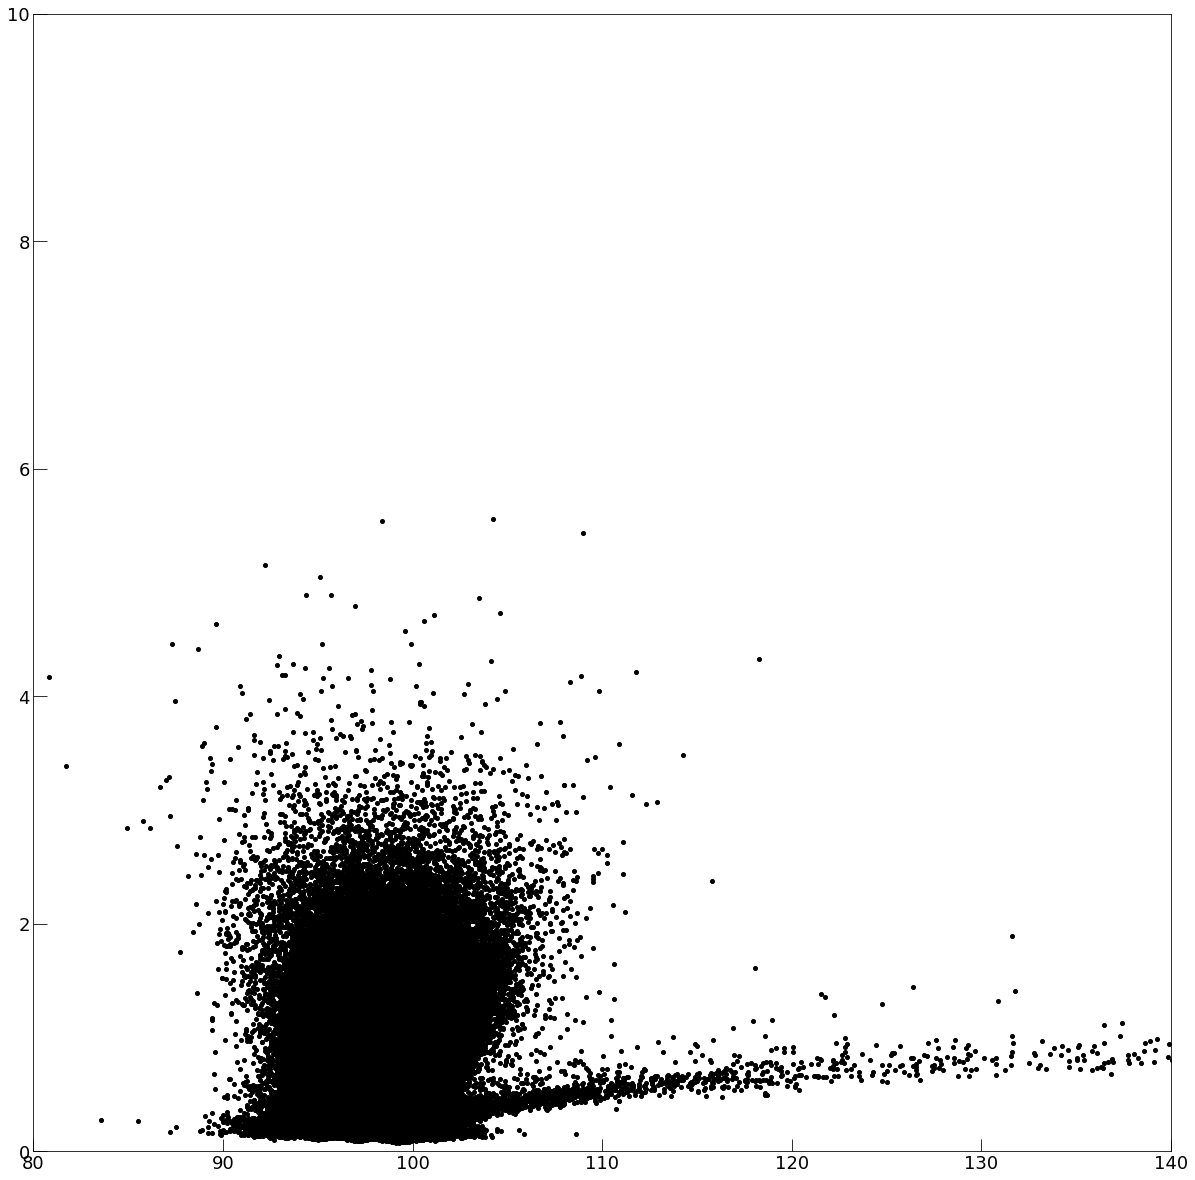

In [5]:
my.set_atlas_style('long')

try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="gray", vmin=95,vmax=130)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=5)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=256, range=(0.0, 256.0), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
#ax[0].hist(imagem[200,200], bins=256, range=(0.0, 256.0), fc='b', ec='k')
#ax[1].hist(images[200,200], bins=100, range=(0.0, 20.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()
#plt.imshow((image-imagem), cmap="gray", vmin=-10,vmax=30)
#
#plt.show()
print ((imagem[imagem<1000]).mean(), np.sqrt(imagem[imagem<1000].var()))
my.set_atlas_style('large')
plt.plot(imagem, images, 'k.', )
plt.xlim((80, 140))
plt.ylim((0, 10))
plt.show()

In [11]:
print ("mean: %.2f, sigma: %.2f, over th %.2f" % 
       (imagem[imagem<150].mean(), 
        np.sqrt(imagem[imagem<150].var()), 
        (imagem>150).sum()))
print ("mean: %.2f, sigma: %.2f, over th %.2f" % 
       (images[images<10].mean(), 
        np.sqrt(images[images<10].var()), 
        (images>10).sum()))
for x in range(0,len(images)):
    for y in range(0,len(images)):
        if imagem[x,y]>150:
            print ("%d, %d \t %.1f \t %.1f" % (x, y, imagem[x,y],images[x,y]))

mean: 98.49, sigma: 1.28, over th 577.00
mean: 2.43, sigma: 1.44, over th 78572.00
0, 1642 	 156.9 	 9.7
3, 1279 	 167.7 	 13.8
4, 1877 	 174.8 	 12.2
15, 754 	 199.8 	 15.9
17, 468 	 151.8 	 10.5
27, 1711 	 305.8 	 20.1
28, 1366 	 418.9 	 22.8
32, 1014 	 191.6 	 15.8
36, 1910 	 254.7 	 17.7
37, 311 	 189.9 	 15.2
39, 827 	 152.4 	 10.6
51, 1068 	 157.7 	 11.8
54, 1920 	 184.3 	 12.8
60, 668 	 165.3 	 10.2
61, 507 	 176.2 	 12.0
61, 1596 	 156.8 	 10.8
65, 1608 	 188.3 	 12.9
68, 601 	 286.1 	 18.0
71, 56 	 206.3 	 12.6
71, 1106 	 244.8 	 12.6
84, 1973 	 217.9 	 16.2
86, 576 	 261.3 	 13.3
89, 1850 	 194.5 	 13.7
89, 1888 	 228.2 	 15.7
98, 1440 	 154.1 	 9.6
104, 921 	 327.6 	 18.6
106, 476 	 164.6 	 10.5
107, 167 	 261.0 	 20.9
110, 1092 	 198.6 	 21.0
111, 916 	 169.3 	 11.7
112, 1713 	 629.8 	 33.0
113, 1244 	 193.3 	 12.7
114, 1856 	 151.7 	 11.0
121, 1496 	 249.7 	 17.3
121, 1663 	 180.0 	 12.7
124, 376 	 202.6 	 16.1
124, 1230 	 192.5 	 13.7
129, 0 	 188.2 	 14.7
129, 83 	 163.3

1513, 1476 	 198.9 	 14.8
1516, 1475 	 198.6 	 10.9
1516, 2021 	 156.9 	 11.2
1524, 1422 	 156.8 	 9.3
1536, 981 	 259.0 	 18.0
1543, 4 	 189.4 	 11.9
1548, 283 	 155.2 	 12.4
1556, 1596 	 159.5 	 11.3
1558, 296 	 179.8 	 11.5
1570, 715 	 221.8 	 15.0
1574, 1239 	 162.0 	 11.9
1575, 1552 	 155.7 	 10.6
1580, 420 	 212.4 	 11.9
1581, 91 	 160.5 	 11.4
1586, 1808 	 199.5 	 12.9
1589, 833 	 173.1 	 9.8
1590, 1213 	 174.1 	 10.2
1593, 1498 	 153.5 	 9.8
1598, 140 	 154.9 	 10.3
1601, 1591 	 170.5 	 13.9
1601, 1927 	 302.6 	 22.3
1604, 507 	 272.4 	 16.3
1605, 933 	 207.9 	 15.0
1609, 1424 	 164.6 	 13.5
1609, 1658 	 314.0 	 20.0
1612, 634 	 329.5 	 18.3
1612, 898 	 318.0 	 22.0
1612, 1330 	 151.6 	 8.5
1614, 369 	 191.5 	 12.8
1615, 1221 	 165.0 	 11.4
1615, 1595 	 176.5 	 10.5
1617, 1122 	 263.7 	 20.2
1618, 580 	 154.6 	 9.6
1618, 1502 	 424.6 	 24.1
1619, 1620 	 262.7 	 20.0
1630, 266 	 150.8 	 10.7
1634, 1292 	 366.6 	 25.0
1639, 1635 	 267.1 	 19.2
1643, 1596 	 183.3 	 13.2
1648, 1340

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


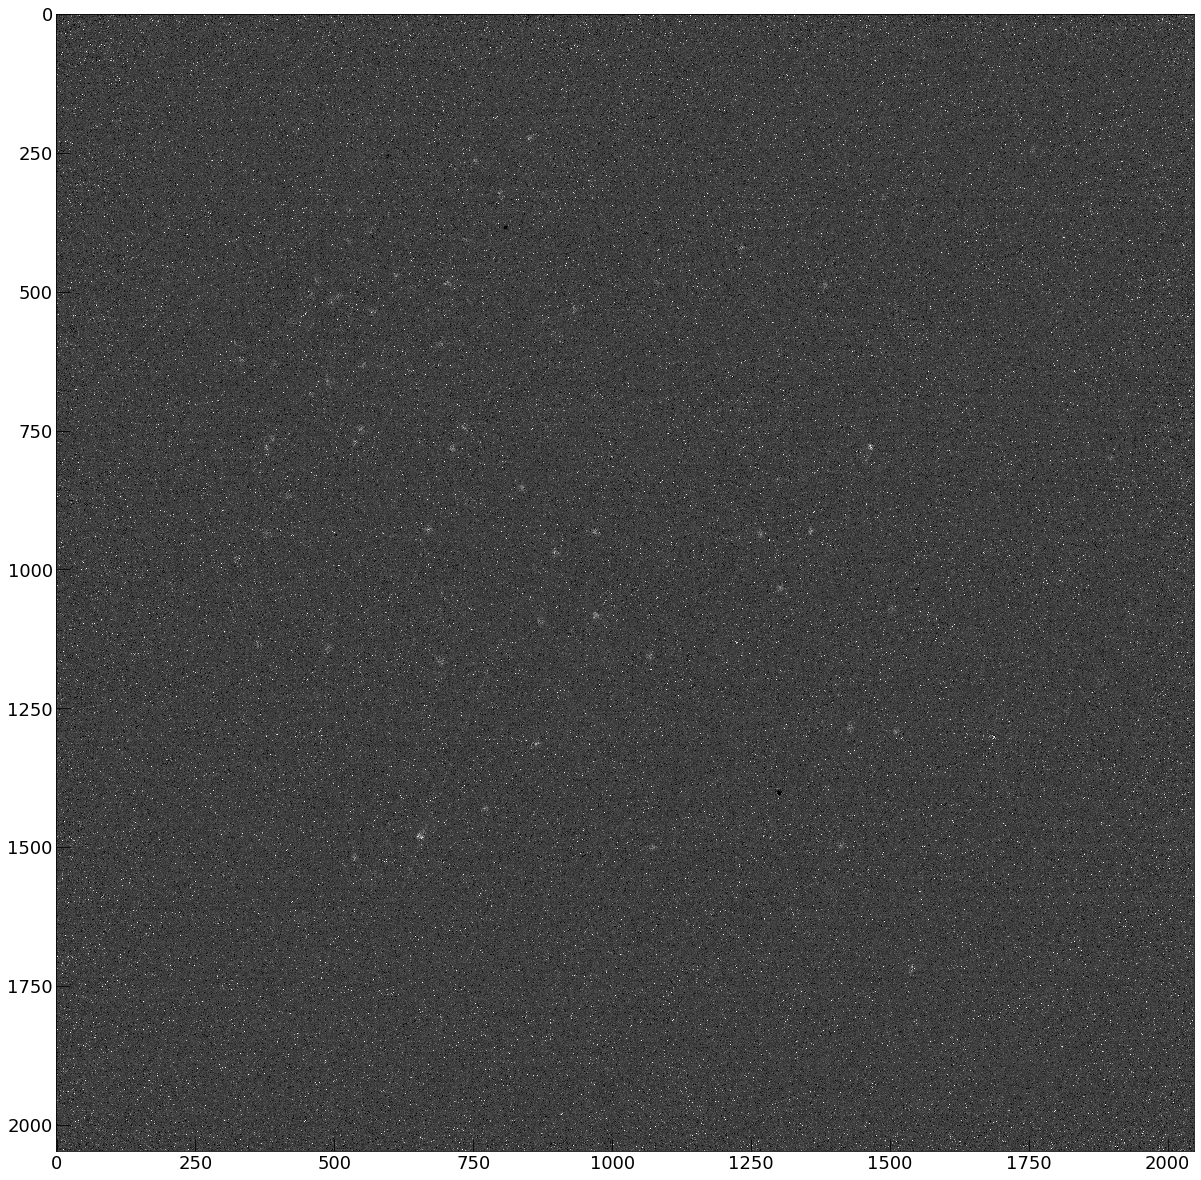

In [6]:
plt.imshow((image-imagem), cmap="gray", vmin=-10,vmax=30)

plt.show()

In [11]:
(image-imagem).max()

171.3699999999999

In [4]:
file_name_jpg=("./ImageI%dRun%d.png" % (traccia, run))

scipy.misc.toimage(image, cmin=85,cmax=120).save(file_name_jpg)



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
run = 820
for traccia in range(0,100):
    try:
        print(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
        image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
        
    except:
        print("ciao")
    